### Importing library and data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the data
df_accepted = pd.read_csv('/home/jabez/Documents/week_8/Logistic-optimization-Delivery-drivers-location-optimisation-with-Causal-Inference-/data/df_trip_processed.csv')
df_rejected = pd.read_csv('/home/jabez/Documents/week_8/Logistic-optimization-Delivery-drivers-location-optimisation-with-Causal-Inference-/data/rejected.csv')
df_accepted = df_accepted.drop(columns=['Unnamed: 0'])
df_rejected = df_rejected.drop(columns=['Unnamed: 0'])
df_accepted[df_accepted['day_type']=='weekend']

,icon,Trip ID,lat_org,lon_org,lat_des,lon_des,holiday_name,day_type,trip_start_time,trip_end_time,speed_kmh,distance_km,time_hours


In [13]:
df_accepted

,icon,order_id,lat_org,lon_org,lat_des,lon_des,holiday_name,day_type,date,driver_action
0,rain,391996,6.508813,3.377403,6.650970,3.345031,No holiday,Weekday,2021-07-01,accepted
1,rain,391997,6.431671,3.455538,6.428081,3.472189,No holiday,Weekday,2021-07-01,accepted
2,rain,391998,6.631679,3.338898,6.508324,3.359040,No holiday,Weekday,2021-07-01,accepted
3,rain,391999,6.572757,3.367708,6.584881,3.361407,No holiday,Weekday,2021-07-01,accepted
4,rain,392001,6.601042,3.276634,6.450107,3.391615,No holiday,Weekday,2021-07-01,accepted
...,...,...,...,...,...,...,...,...,...,...
534363,rain,1345209,6.635022,3.338230,6.460184,3.193621,No holiday,Weekday,2022-05-19,accepted
534364,partly-cloudy-day,1604908,6.509019,3.387048,6.626393,3.325983,No holiday,Weekday,2022-05-30,accepted
534365,rain,1488991,6.444520,3.547642,6.606708,3.318793,No holiday,Weekday,2022-06-03,accepted
534366,partly-cloudy-day,1420310,6.452809,3.433489,6.557231,3.290836,No holiday,Weekend,2022-06-03,accepted


In [ ]:
df_accepted.rename(columns={'Trip ID': 'order_id'}, inplace=True)
df_rejected.rename(columns={'lat': 'lat_org'}, inplace=True)
df_rejected.rename(columns={'lng': 'lon_org'}, inplace=True)
lat_lon = df_accepted[['order_id','lat_des','lon_des']]
df_rejected = df_rejected.merge(lat_lon, on='order_id', how='left')
df_rejected

In [4]:

df_rejected.drop(columns=['id'], inplace=True)
df_accepted.drop(columns=['speed_kmh','distance_km','time_hours','trip_end_time'], inplace=True)
df_accepted[['date', 'time']] = df_accepted['trip_start_time'].str.split(' ', expand=True)
df_accepted.drop(columns=['time'], inplace=True)
df_accepted.drop(columns=['trip_start_time'], inplace=True)
df_accepted['driver_action']= 'accepted'
df_concatenated = pd.concat([df_accepted, df_rejected], axis=0, ignore_index=True)
df_concatenated.rename(columns={'icon': 'daily_weather'}, inplace=True)

,icon,order_id,lat_org,lon_org,lat_des,lon_des,holiday_name,day_type,date,driver_action,driver_id
0,rain,391996,6.508813,3.377403,6.650970,3.345031,No holiday,Weekday,2021-07-01,accepted,NaN
1,rain,391997,6.431671,3.455538,6.428081,3.472189,No holiday,Weekday,2021-07-01,accepted,NaN
2,rain,391998,6.631679,3.338898,6.508324,3.359040,No holiday,Weekday,2021-07-01,accepted,NaN
3,rain,391999,6.572757,3.367708,6.584881,3.361407,No holiday,Weekday,2021-07-01,accepted,NaN
4,rain,392001,6.601042,3.276634,6.450107,3.391615,No holiday,Weekday,2021-07-01,accepted,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2064210,rain,517948,6.469036,3.566877,6.500608,3.598194,No holiday,Weekday,2021-09-10,rejected,243774.0
2064211,rain,517948,6.425431,3.527358,6.500608,3.598194,No holiday,Weekday,2021-09-10,rejected,245447.0
2064212,rain,517948,6.440013,3.525378,6.500608,3.598194,No holiday,Weekday,2021-09-10,rejected,239866.0
2064213,rain,517948,6.469036,3.566877,6.500608,3.598194,No holiday,Weekday,2021-09-10,rejected,243774.0


In [9]:

df_concatenated.columns

Index(['daily_weather', 'order_id', 'lat_org', 'lon_org', 'lat_des', 'lon_des',
       'holiday_name', 'day_type', 'date', 'driver_action', 'driver_id'],
      dtype='object')

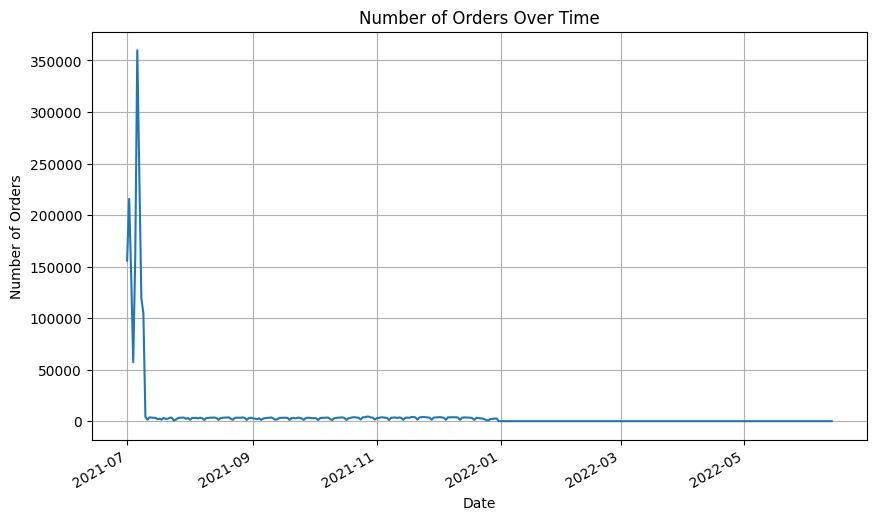

In [14]:
df_concatenated['date'] = pd.to_datetime(df_concatenated['date'])

# Group by date and count orders
orders_over_time = df_concatenated.groupby('date').size()

# Plot
plt.figure(figsize=(10, 6))
orders_over_time.plot()
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

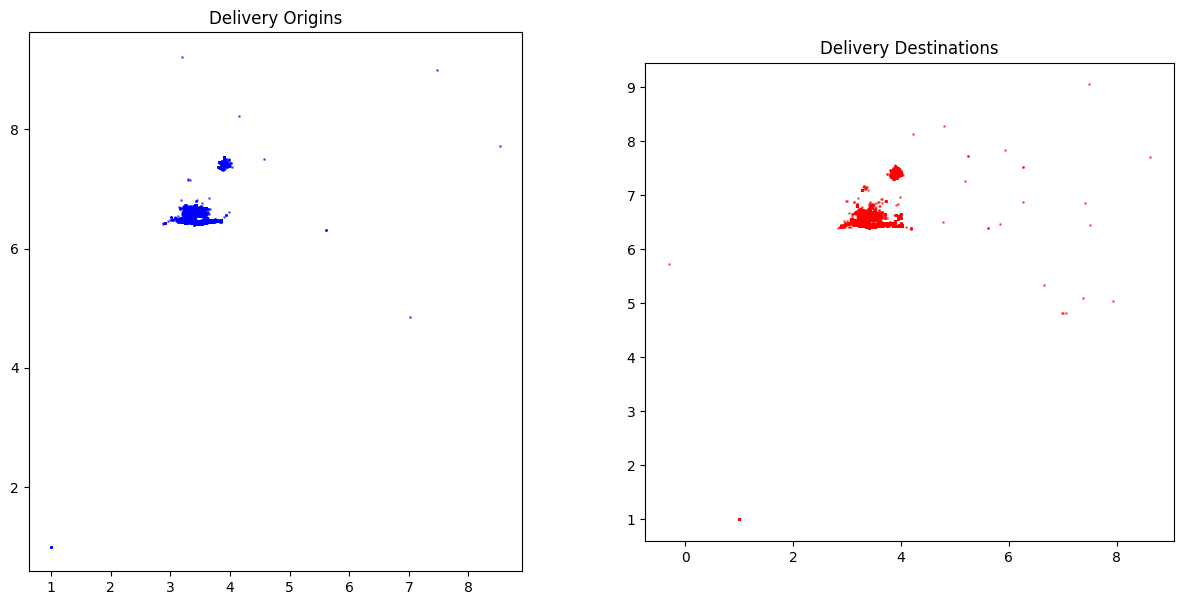

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Sample data loading
# df_concatenated = pd.read_csv('your_data.csv')

# Create GeoDataFrame for origins and destinations
gdf_orig = gpd.GeoDataFrame(df_concatenated, geometry=gpd.points_from_xy(df_concatenated.lon_org, df_concatenated.lat_org))
gdf_dest = gpd.GeoDataFrame(df_concatenated, geometry=gpd.points_from_xy(df_concatenated.lon_des, df_concatenated.lat_des))

# Plot
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
gdf_orig.plot(ax=ax[0], markersize=1, color='blue', alpha=0.5)
gdf_dest.plot(ax=ax[1], markersize=1, color='red', alpha=0.5)
ax[0].set_title('Delivery Origins')
ax[1].set_title('Delivery Destinations')
plt.show()

## Filtering orders
Since the rejected orders are accepted by other drivers, we can analyze those orders to identify causality. By examining the orders that were initially rejected but then accepted by other drivers, we may be able to uncover the underlying reasons or patterns that led to the initial rejection. This analysis could provide valuable insights to improve the order allocation process and reduce the number of rejected orders in the future.

In [12]:
# Step 1: Identify the duplicated values in the specified column
duplicated_values = df_concatenated['order_id'][df_concatenated['order_id'].duplicated()].unique()

# Step 2: Filter the DataFrame to get rows with these duplicated values
filtered_df = df_concatenated[df_concatenated['order_id'].isin(duplicated_values)]
filtered_df

,id,order_id,driver_id,driver_action,lat,lng,distance_to_centroid_km
0,1,392001,243828,accepted,6.602207,3.270465,14.055713
10,11,392005,245597,accepted,6.549147,3.392184,2.070733
61,62,392009,245600,accepted,6.644829,3.289328,15.626902
128,129,392013,243892,accepted,6.435331,3.424317,12.271333
141,142,392014,243781,accepted,6.498221,3.360042,4.691080
...,...,...,...,...,...,...,...
1557594,1557595,489898,246615,accepted,6.443810,3.464208,13.929642
1557614,1557615,490008,247877,accepted,6.448554,3.574380,23.688754
1557670,1557671,497721,243414,accepted,6.498164,3.359964,4.700566
1557673,1557674,510268,243532,accepted,6.462251,3.391023,8.312973


In [ ]:
filtered_df[filtered_df['driver_action']=='accepted']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the style of the visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='distance_to_client_km', y='order_id', hue='driver_action')
plt.title('Driver Actions (Accept/Reject) Based on Distance to Client')
plt.xlabel('Distance to Client (km)')
plt.ylabel('Order ID')
plt.legend(title='Driver Action')
plt.show()


In [ ]:
sns.set(style="whitegrid")

# Create a lineplot to show the sequence of rejections and acceptance for each order
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=filtered_df, 
    x='date', 
    y='order_id', 
    hue='driver_action', 
    marker='o', 
    style='driver_action',
    palette={'accepted': 'green', 'rejected': 'red'}
)

# Add titles and labels
plt.title('Sequence of Driver Actions for Each Order')
plt.xlabel('Timestamp')
plt.ylabel('Order ID')

# Show plot
plt.show()

In [ ]:
# Group by order_id and calculate the number of rejections before acceptance
rejection_counts = filtered_df[filtered_df['driver_action'] == 'rejected'].groupby('order_id').size().reset_index(name='num_rejections')

# Merge with the original DataFrame to get orders that have an acceptance
accepted_orders = filtered_df[filtered_df['driver_action'] == 'accepted'][['order_id']].drop_duplicates()
summary_df = pd.merge(rejection_counts, accepted_orders, on='order_id', how='right').fillna(0)

summary_df['num_rejections'] = summary_df['num_rejections'].astype(int)
summary_df


In [ ]:
total_orders = filtered_df['order_id'].nunique()
accepted_orders_count = summary_df['order_id'].nunique()
rejected_orders_count = total_orders - accepted_orders_count
average_rejections_before_acceptance = summary_df['num_rejections'].mean()

statistics = {
    'Total Orders': total_orders,
    'Accepted Orders': accepted_orders_count,
    'Rejected Orders': rejected_orders_count,
    'Average Rejections Before Acceptance': average_rejections_before_acceptance
}

statistics


## Calculating the mean distance
One thing that causes drivers to reject a delivery request mightbe the location. Therefore by calculating the mean distance for accepted requests and rejected, we can might gain useful insight

In [7]:
# Calculatin the mean distance 
lon_mean = df_locations['lng'].mean()
lat_mean = df_locations['lat'].mean()

In [8]:
# Function to calculate the distance using latitude and longtiude 

from math import radians, sin, cos, sqrt, atan2
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    # Calculate the differences
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Calculate the distance using the Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

In [9]:
# Calculating the distance of each order to the mean loaction
df_locations['distance_to_centroid_km'] = df_locations.apply(lambda row: haversine_distance(row['lat'], row['lng'], lat_mean, lon_mean), axis=1)

In [33]:
df_locations['order_id'].nunique()

26492

In [14]:
from scipy.stats import ttest_ind

# Get distances for accepted and rejected orders
accepted_distances = df_locations[df_locations['driver_action'] == 'accepted']['distance_to_centroid_km']
rejected_distances = df_locations[df_locations['driver_action'] == 'rejected']['distance_to_centroid_km']

# Perform t-test
t_stat, p_value = ttest_ind(accepted_distances, rejected_distances)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 83.00810257237934
P-value: 0.0


### Result
The t-test results indicate a very high t-statistic and a p-value of 0.0.
- T-statistic: The t-statistic of 83.01 is extremely high, which suggests a very large difference between the means of the two groups (accepted and rejected orders). In other words, the distance from the mean location for accepted orders is significantly different from the distance for rejected orders.
- P-value: A p-value of 0.0 (practically, it’s extremely close to 0) indicates that the difference observed is statistically significant. This means there is a very low probability that the observed differences in distances happened by chance. Essentially, we can reject the null hypothesis that there is no difference between the groups with very high confidence.

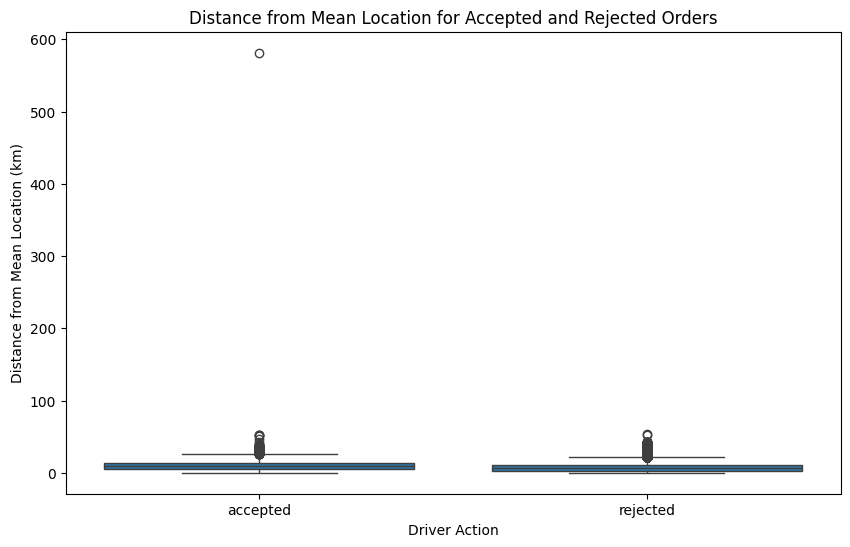

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='driver_action', y='distance_to_centroid_km', data=df_locations)
plt.xlabel('Driver Action')
plt.ylabel('Distance from Mean Location (km)')
plt.title('Distance from Mean Location for Accepted and Rejected Orders')
plt.show()

/tmp/ipykernel_5844/1359453683.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_locations[df_locations['driver_action'] == 'accepted']['distance_to_centroid_km'], shade=True, label='Accepted', color='green')
/tmp/ipykernel_5844/1359453683.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_locations[df_locations['driver_action'] == 'rejected']['distance_to_centroid_km'], shade=True, label='Rejected', color='red')


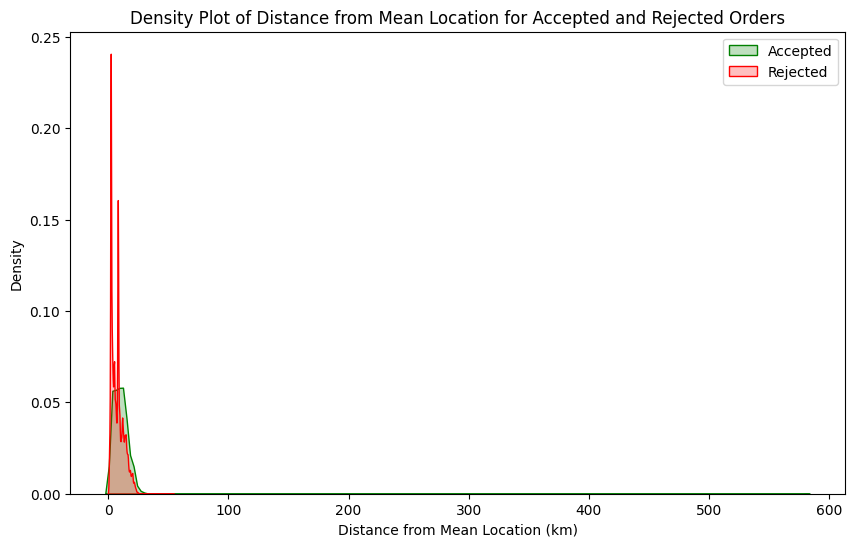

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_locations[df_locations['driver_action'] == 'accepted']['distance_to_centroid_km'], shade=True, label='Accepted', color='green')
sns.kdeplot(df_locations[df_locations['driver_action'] == 'rejected']['distance_to_centroid_km'], shade=True, label='Rejected', color='red')
plt.xlabel('Distance from Mean Location (km)')
plt.ylabel('Density')
plt.title('Density Plot of Distance from Mean Location for Accepted and Rejected Orders')
plt.legend()
plt.show()

In [ ]:
colors = ['red', 'blue', 'green', 'purple', 'orange']  # List of colors

# Scatter Plot with Colors
plt.scatter(df_trip[''], df2['Y'], color=colors)
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('Scatter Plot with Different Colors from Different DataFrames')
plt.show()

In [18]:
df_rejected = df_locations[df_locations['driver_action']=='rejected']
df_rejected

,id,order_id,driver_id,driver_action,lat,lng,distance_to_centroid_km
1,2,392001,243588,rejected,6.592097,3.287445,11.869231
2,3,392001,243830,rejected,6.596133,3.281784,12.637143
3,4,392001,243539,rejected,6.596142,3.280526,12.755756
4,5,392001,171653,rejected,6.609232,3.288800,12.855326
5,6,392001,245662,rejected,6.593095,3.287759,11.898462
...,...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877,22.065685
1557736,1557737,517948,245447,rejected,6.425431,3.527358,20.502798
1557737,1557738,517948,239866,rejected,6.440013,3.525378,19.390130
1557738,1557739,517948,243774,rejected,6.469036,3.566877,22.065685


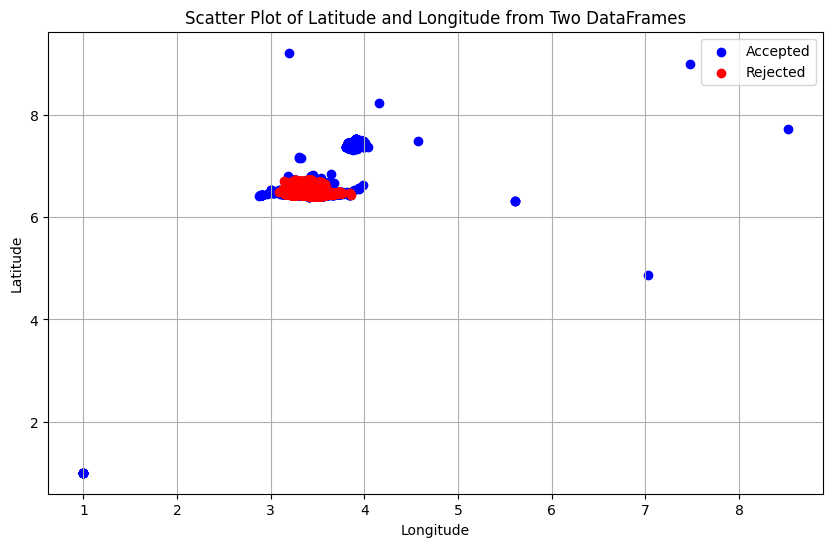

In [19]:
plt.figure(figsize=(10, 6))

# Scatter plot for the first dataframe
plt.scatter(df_trip['lon_org'], df_trip['lat_org'], color='blue', label='Accepted')

# Scatter plot for the second dataframe
plt.scatter(df_rejected['lng'], df_rejected['lat'], color='red', label='Rejected')

# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude from Two DataFrames')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [35]:
df_rejected_orderid =  df_rejected['order_id'].unique()
df_rejected_orderid

array([392001, 392005, 392009, ..., 497721, 510268, 517948])

In [36]:
filtered_df = df_trip[df_trip['Trip ID'].isin(df_rejected_orderid)]
filtered_df

,icon,Trip ID,lat_org,lon_org,lat_des,lon_des,holiday_name,day_type,trip_start_time,trip_end_time,speed_kmh,distance_km,time_hours
4,rain,392001,6.601042,3.276634,6.450107,3.391615,No holiday,Weekday,2021-07-01 09:30:59,2021-07-01 09:34:36,349.187758,21.048262,0.060278
5,rain,392005,6.565088,3.384441,6.499696,3.350907,No holiday,Weekday,2021-07-01 10:53:36,2021-07-01 11:27:51,14.295825,8.160534,0.570833
6,rain,392009,6.663648,3.308206,6.618542,3.301634,No holiday,Weekday,2021-07-01 06:39:51,2021-07-01 07:41:12,4.956324,5.067841,1.022500
7,rain,392013,6.430817,3.434155,6.435460,3.484655,No holiday,Weekday,2021-07-01 08:44:09,2021-07-01 09:19:11,9.597310,5.603762,0.583889
8,rain,392014,6.499156,3.358517,6.428091,3.515717,No holiday,Weekday,2021-07-01 06:43:07,2021-07-01 07:27:24,25.854164,19.081810,0.738056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181205,partly-cloudy-day,497721,6.482082,3.382865,6.463248,3.623976,No holiday,Weekend,2021-09-04 14:30:57,2021-09-04 15:18:38,33.623890,26.721652,0.794722
197289,rain,517948,6.443374,3.552312,6.500608,3.598194,No holiday,Weekday,2021-09-10 11:47:26,2021-09-10 13:30:13,4.749622,8.136366,1.713056
534289,clear-day,510268,6.449419,3.401645,6.607010,3.350195,No holiday,Weekday,2022-01-21 11:05:47,2022-01-21 12:12:39,16.530333,18.422138,1.114444
534304,partly-cloudy-day,489898,6.442073,3.478872,6.439366,3.502058,No holiday,Weekday,2022-02-04 17:09:00,2022-02-04 17:51:19,3.657481,2.579540,0.705278


In [48]:
df_rejected_date = filtered_df[['trip_start_time', 'Trip ID','holiday_name','day_type', 'icon']]
df_rejected_date.rename(columns={'Trip ID': 'order_id'}, inplace=True)
df_rejected_date

/tmp/ipykernel_5844/3360485004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rejected_date.rename(columns={'Trip ID': 'order_id'}, inplace=True)


,trip_start_time,order_id,holiday_name,day_type,icon
4,2021-07-01 09:30:59,392001,No holiday,Weekday,rain
5,2021-07-01 10:53:36,392005,No holiday,Weekday,rain
6,2021-07-01 06:39:51,392009,No holiday,Weekday,rain
7,2021-07-01 08:44:09,392013,No holiday,Weekday,rain
8,2021-07-01 06:43:07,392014,No holiday,Weekday,rain
...,...,...,...,...,...
181205,2021-09-04 14:30:57,497721,No holiday,Weekend,partly-cloudy-day
197289,2021-09-10 11:47:26,517948,No holiday,Weekday,rain
534289,2022-01-21 11:05:47,510268,No holiday,Weekday,clear-day
534304,2022-02-04 17:09:00,489898,No holiday,Weekday,partly-cloudy-day


In [49]:
df_location = df_rejected.merge(df_rejected_date, on='order_id', how='inner')
df_location[['date', 'time']] = df_location['trip_start_time'].str.split(' ', expand=True)
df_location.drop(columns=['time'], inplace=True)
df_location.drop(columns=['trip_start_time'], inplace=True)
df_location

,id,order_id,driver_id,driver_action,lat,lng,distance_to_centroid_km,holiday_name,day_type,icon,date
0,2,392001,243588,rejected,6.592097,3.287445,11.869231,No holiday,Weekday,rain,2021-07-01
1,3,392001,243830,rejected,6.596133,3.281784,12.637143,No holiday,Weekday,rain,2021-07-01
2,4,392001,243539,rejected,6.596142,3.280526,12.755756,No holiday,Weekday,rain,2021-07-01
3,5,392001,171653,rejected,6.609232,3.288800,12.855326,No holiday,Weekday,rain,2021-07-01
4,6,392001,245662,rejected,6.593095,3.287759,11.898462,No holiday,Weekday,rain,2021-07-01
...,...,...,...,...,...,...,...,...,...,...,...
1529842,1557736,517948,243774,rejected,6.469036,3.566877,22.065685,No holiday,Weekday,rain,2021-09-10
1529843,1557737,517948,245447,rejected,6.425431,3.527358,20.502798,No holiday,Weekday,rain,2021-09-10
1529844,1557738,517948,239866,rejected,6.440013,3.525378,19.390130,No holiday,Weekday,rain,2021-09-10
1529845,1557739,517948,243774,rejected,6.469036,3.566877,22.065685,No holiday,Weekday,rain,2021-09-10


In [43]:
status = df_location['holiday_name'].value_counts()


status

holiday_name
No holiday    1529847
Name: count, dtype: int64

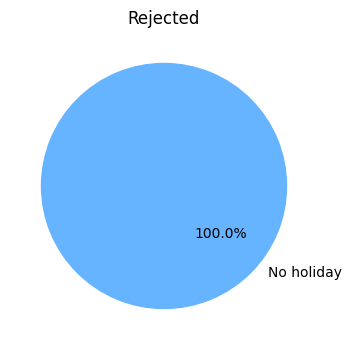

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.pie(status, labels=status.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Rejected')
plt.show()

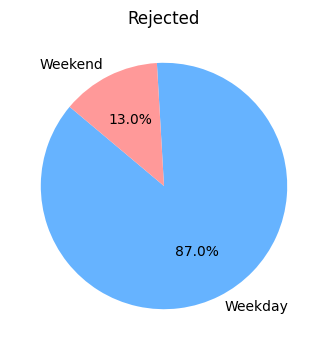

In [47]:
status = df_location['day_type'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(status, labels=status.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Rejected')
plt.show()

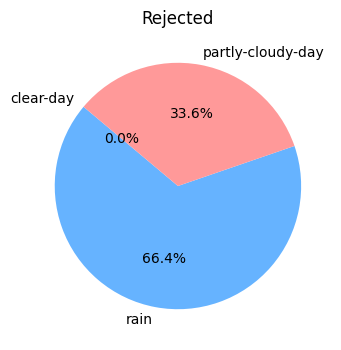

In [50]:
status = df_location['icon'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(status, labels=status.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Rejected')
plt.show()

In [20]:
df_rejected = df_locations[df_locations['driver_action'] == 'rejected']
rejection_counts = df_rejected.groupby(['order_id', 'lat', 'lng']).size().reset_index(name='rejection_count')
sorted_rejection_counts = rejection_counts.sort_values(by='rejection_count', ascending=False)
sorted_rejection_counts.head(20)

,order_id,lat,lng,rejection_count
211677,415800,6.544298,3.362667,173
94387,401129,6.524689,3.384099,99
94484,401129,6.541203,3.377473,99
145563,406150,6.558767,3.340308,88
145550,406150,6.551414,3.340012,88
145542,406150,6.538358,3.332283,88
94548,401129,6.544405,3.363869,81
94298,401129,6.511266,3.377688,81
94492,401129,6.543694,3.362664,81
94497,401129,6.544186,3.363415,81


In [25]:
average_lat = df_rejected['lat'].mean()
average_lon = df_rejected['lng'].mean()
average_lat


6.536165040987763

In [26]:
df_rejected

,id,order_id,driver_id,driver_action,lat,lng
1,2,392001,243588,rejected,6.592097,3.287445
2,3,392001,243830,rejected,6.596133,3.281784
3,4,392001,243539,rejected,6.596142,3.280526
4,5,392001,171653,rejected,6.609232,3.288800
5,6,392001,245662,rejected,6.593095,3.287759
...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877
1557736,1557737,517948,245447,rejected,6.425431,3.527358
1557737,1557738,517948,239866,rejected,6.440013,3.525378
1557738,1557739,517948,243774,rejected,6.469036,3.566877


In [24]:
from math import radians, sin, cos, sqrt, atan2
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    # Calculate the differences
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Calculate the distance using the Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

In [27]:
df_rejected['distance_to_centroid_km'] = df_rejected.apply(lambda row: haversine_distance(row['lat'], row['lng'], average_lat, average_lon), axis=1)

/tmp/ipykernel_20312/3498512863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rejected['distance_to_centroid_km'] = df_rejected.apply(lambda row: haversine_distance(row['lat'], row['lng'], average_lat, average_lon), axis=1)


In [28]:
df_rejected

,id,order_id,driver_id,driver_action,lat,lng,distance_to_centroid_km
1,2,392001,243588,rejected,6.592097,3.287445,11.844979
2,3,392001,243830,rejected,6.596133,3.281784,12.612880
3,4,392001,243539,rejected,6.596142,3.280526,12.731508
4,5,392001,171653,rejected,6.609232,3.288800,12.830958
5,6,392001,245662,rejected,6.593095,3.287759,11.874188
...,...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877,22.088897
1557736,1557737,517948,245447,rejected,6.425431,3.527358,20.527175
1557737,1557738,517948,239866,rejected,6.440013,3.525378,19.414446
1557738,1557739,517948,243774,rejected,6.469036,3.566877,22.088897


In [ ]:
from scipy.stats import ttest_ind

# Get distances for accepted and rejected orders
accepted_distances = df[df['driver_action'] == 'accepted']['distance_from_mean']
rejected_distances = df[df['driver_action'] == 'rejected']['distance_from_mean']

# Perform t-test
t_stat, p_value = ttest_ind(accepted_distances, rejected_distances)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

In [29]:
import matplotlib.pyplot as plt

plt.hist(df_rejected['distance_km'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Distance for Rejected Orders')
plt.show()

KeyError: 'distance_km'

In [3]:
df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 71.3+ MB


In [4]:
df_locations['driver_id'].nunique()

1213

1213 Drivers

In [4]:
status = df_locations['driver_action'].value_counts()
status

driver_action
rejected    1531837
accepted      25903
Name: count, dtype: int64

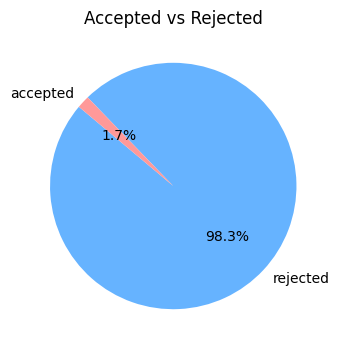

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.pie(status, labels=status.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Accepted vs Rejected')
plt.show()

In [14]:
df_trip

KeyError: '_oh'